In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import datetime
import time
import requests
import json
import dateutil.parser
import unicodedata
from dotenv import load_dotenv
from pytwitter import Api

# Load  ENV
load_dotenv()

# Set Alpaca API key and secret
# YOUR CODE HERE

twitter_api_key = os.getenv('twitter_api_key')
twitter_api_secret_key = os.getenv('twitter_api_secret_key')
bearer_token = Api(os.getenv('bearer_token'))

print(type(twitter_api_key))
print(type(twitter_api_secret_key))
print(type(bearer_token))

<class 'str'>
<class 'str'>
<class 'pytwitter.api.Api'>


In [2]:
from datetime import datetime

def convert_id_to_date(idd):
    shifted = int(idd) >> 22
    timestamp=shifted+1288834974657
    time_created = datetime.fromtimestamp(timestamp/1000).strftime('%Y-%m-%d %H:%M:%S')
    return time_created

tweet_response_XRP = bearer_token.search_tweets(query='XRP', max_results=100)

XRP_tweet_data = tweet_response_XRP.data

for tweet in XRP_tweet_data:
    print(tweet.text)
    print(convert_id_to_date(tweet.id))
    

RT @TIPsWorlds: ＼✨$XRP エアドロ企画！✨／

／
$20XRP 5名
＼

【応募方法】
1️⃣@TIPsWORLDs をフォロー！

2️⃣固定ツイートをRT

3️⃣このツイートをRTでエントリー完了！

🎯4/15まで

📩当選はツイートにて発表📩…
2022-04-14 20:57:04
@coinspotau HBAR, a heap of other would say ETH, XRP, VRA or ADA. I think people are sleeping on the enterprise adaption. With huge players on the governing council like Google, Boeing,  EFTPOS etc. I can see it being a strong contender in the next 5-10 years @coinspotau
2022-04-14 20:57:04
XRP price shows a bullish view from a technical standpoint, hinting at a revisit of $1📈🪙
READ || A mini-guide to Altcoins
https://t.co/65A79Ydndo

#XRP | #cryptocurrency | #CryptoNews https://t.co/aC5641cgfe
2022-04-14 20:57:02
月足、週足、日足で一目と２００日移動平均線とＭＡＣＤで中長期のトレンド確認してる
https://t.co/c2uq5TgK0o

#FX #FOREX #仮想通貨 #暗号通貨 #ゴールド #BTC #Crypto #GOLD #XAUUSD #XRP #ETH #NFT #altcoin #投資家さんと繋がりたい #投資初心者と繋がりたい
2022-04-14 20:57:00
I will keep #XRP for the rest of my long life!

https://t.co/Zdvg6DT8UO
2022-04-14 20:56:59
RT @TIPsWorlds: ＼✨$XRP エアドロ企画！✨／

／


In [3]:
XRP_df = pd.DataFrame(XRP_tweet_data)
XRP_df['id']=XRP_df['id'].apply(lambda x: convert_id_to_date(x))
XRP_df

,id,text,attachments,author_id,context_annotations,conversation_id,created_at,entities,geo,in_reply_to_user_id,...,non_public_metrics,organic_metrics,possibly_sensitive,promoted_metrics,public_metrics,referenced_tweets,reply_settings,source,withheld,matching_rules
0,2022-04-14 20:57:04,RT @TIPsWorlds: ＼✨$XRP エアドロ企画！✨／\n\n／\n$20XRP ...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2022-04-14 20:57:04,"@coinspotau HBAR, a heap of other would say ET...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,2022-04-14 20:57:02,XRP price shows a bullish view from a technica...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,2022-04-14 20:57:00,月足、週足、日足で一目と２００日移動平均線とＭＡＣＤで中長期のトレンド確認してる\nhttp...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,2022-04-14 20:56:59,I will keep #XRP for the rest of my long life!...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-04-14 20:55:00,"@BillyM2k Now is the best time to get $DOD, bu...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
96,2022-04-14 20:54:58,I love the smell of Green Candles! $XRP #XRP h...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
97,2022-04-14 20:54:54,素晴らしいイベント！ ＃リップル ＃ビットコイン \n\nhttps://t.co/AUXD...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
98,2022-04-14 20:54:53,@CryptoRobinH00d @shiba_kingdom @AREX_XRP @kim...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [4]:
XRP_df_text = XRP_df. drop(labels=['attachments','author_id','context_annotations','conversation_id','created_at','entities','geo','in_reply_to_user_id','non_public_metrics','organic_metrics','possibly_sensitive',
                                   'promoted_metrics', 'public_metrics', 'referenced_tweets', 'reply_settings', 'source', 'withheld', 'matching_rules','lang'],
                                   axis=1)
XRP_df_text


""" DATA CLEANING AND ANALYSIS IMPORTS """

# Initial imports
import nltk
import pandas as pd
from path import Path
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


# Clean Tweet Data for Sentiment Analysis

# Defining set containing all stopwords in English.

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

# Cleaning and removing the above stop words list from the tweet text

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
XRP_df_text['text'] = XRP_df_text['text'].apply(lambda text: cleaning_stopwords(text))

# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
XRP_df_text['text']= XRP_df_text['text'].apply(lambda x: cleaning_punctuations(x))

# Cleaning and removing repeating characters

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
XRP_df_text['text'] = XRP_df_text['text'].apply(lambda x: cleaning_repeating_char(x))

# Cleaning and removing URL’s
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
XRP_df_text['text'] = XRP_df_text['text'].apply(lambda x: cleaning_URLs(x))


# Removing Emojis from the dataframe: Link Below
""" https://sahil-fruitwala.medium.com/data-cleaning-101-b3d29223f256 """

XRP_df_text = XRP_df_text.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
XRP_df_text.head(20)

#  Sentiment Analysis

def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

# Sentiment scores dictionaries
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in XRP_df_text.iterrows():
    try:
        
        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
text_sentiment_df = pd.DataFrame(text_sent)
XRP_df_text = XRP_df_text.join(text_sentiment_df)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\antho\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
XRP_df_text.head(20)

,id,text,text_compound,text_pos,text_neu,text_neg,text_sent
0,2022-04-14 20:57:04,RT TIPsWorlds XRP 20XRP 5 1TIPsWORLDs 2RT ...,0.0000,0.000,1.000,0.000,0
1,2022-04-14 20:57:04,coinspotau HBAR heap would say ETH XRP VRA ADA...,0.8225,0.262,0.738,0.000,1
2,2022-04-14 20:57:02,XRP price shows bullish view technical standpo...,0.0000,0.000,1.000,0.000,0
3,2022-04-14 20:57:00,httpstcoc2uq5TgK0o FX FOREX BTC Crypto GOL...,0.0000,0.000,1.000,0.000,0
4,2022-04-14 20:56:59,I keep XRP rest long life httpstcoZdvg6DT8UO,0.0000,0.000,1.000,0.000,0
5,2022-04-14 20:56:58,RT TIPsWorlds XRP 20XRP 5 1TIPsWORLDs 2RT ...,0.0000,0.000,1.000,0.000,0
6,2022-04-14 20:56:55,RT shibanfthealer Challenge ACCEPTED 100M 5 W...,0.7885,0.420,0.580,0.000,1
7,2022-04-14 20:56:55,RT WhaleHunterSS Binance futures sinyaller Buy...,0.3612,0.122,0.878,0.000,1
8,2022-04-14 20:56:54,XRP 20XRP 5 1TIPsWORLDs 2RT 3RT 15 XRP ...,0.0000,0.000,1.000,0.000,0
9,2022-04-14 20:56:52,The best part crypto always know bull return s...,0.7783,0.382,0.618,0.000,1


In [6]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

# mystopwords = ['said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'and', 'a']

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
sw.append("u")
sw.append("it")
sw.append("!")
sw.append("(")
sw.append(")")
sw.append("/")
sw.append("/")
sw.append("-")


# Expand the default stopwords list if necessary
# YOUR CODE HERE!

stopwords_expanded = ()

def tokenizer(text):
    
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    words = word_tokenize(text)
                          
    # Remove the punctuation from text 
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Lemmatize words into root word
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
             
    # Remove the stop words 
    output = [word for word in words if not word in sw]
    
    return output

# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

XRP_df_text['token_text'] = XRP_df_text.text.apply(tokenizer)
XRP_df_text

,id,text,text_compound,text_pos,text_neu,text_neg,text_sent,token_text
0,2022-04-14 20:57:04,RT TIPsWorlds XRP 20XRP 5 1TIPsWORLDs 2RT ...,0.0000,0.000,1.000,0.0,0,"[RT, TIPsWorlds, XRP, 20XRP, 5, 1TIPsWORLDs, 2..."
1,2022-04-14 20:57:04,coinspotau HBAR heap would say ETH XRP VRA ADA...,0.8225,0.262,0.738,0.0,1,"[coinspotau, HBAR, heap, would, say, ETH, XRP,..."
2,2022-04-14 20:57:02,XRP price shows bullish view technical standpo...,0.0000,0.000,1.000,0.0,0,"[XRP, price, show, bullish, view, technical, s..."
3,2022-04-14 20:57:00,httpstcoc2uq5TgK0o FX FOREX BTC Crypto GOL...,0.0000,0.000,1.000,0.0,0,"[httpstcoc2uq5TgK0o, FX, FOREX, BTC, Crypto, G..."
4,2022-04-14 20:56:59,I keep XRP rest long life httpstcoZdvg6DT8UO,0.0000,0.000,1.000,0.0,0,"[I, keep, XRP, rest, long, life, httpstcoZdvg6..."
...,...,...,...,...,...,...,...,...
95,2022-04-14 20:55:00,BillyM2k Now best time get DOD buy quickly tak...,0.6369,0.135,0.865,0.0,1,"[BillyM2k, Now, best, time, get, DOD, buy, qui..."
96,2022-04-14 20:54:58,I love smell Green Candles XRP XRP httpstco5XE...,0.6369,0.412,0.588,0.0,1,"[I, love, smell, Green, Candles, XRP, XRP, htt..."
97,2022-04-14 20:54:54,httpstcoAUXDvslcWH,0.0000,0.000,1.000,0.0,0,[httpstcoAUXDvslcWH]
98,2022-04-14 20:54:53,CryptoRobinH00d shibakingdom AREXXRP kimtuan20...,0.0000,0.000,1.000,0.0,0,"[CryptoRobinH00d, shibakingdom, AREXXRP, kimtu..."


In [7]:
""" SAVE AS CSV FOR MORE ANALYSIS """

XRP_df_text.to_csv("Results\generalpop_XRP_sentiment_analysis_mostrecent2022.csv")

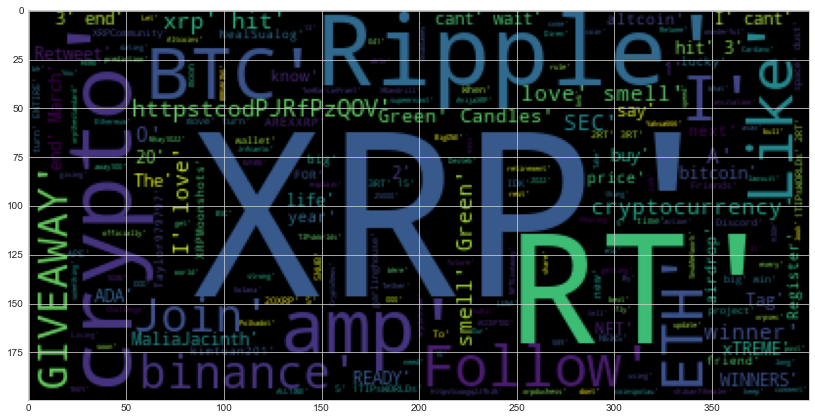

In [ ]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
XRP_df_text['text']= XRP_df_text['text'].apply(lambda x: stemming_on_text(x))
XRP_df_text['text'].head()

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

# Generate the Bitcoin word cloud
# YOUR CODE HERE
token_text_df_XRP = XRP_df_text['token_text']
token_text_df_XRP

XRP_df_text = ' '.join(str(e) for e in token_text_df_XRP)
XRP_df_text

wc = WordCloud().generate(XRP_df_text)
plt.figure( figsize=(14,8) )
plt.imshow(wc)